##  1. 손글씨 숫자

+ 원복 데이타
    - UCI Machine Leanring Repository 에 공개
    - http://archive.ics.uci.edu/ml/datasets  > optical recognition of handwritten digits
    - 8x8 픽셀의 2차원 배열의 데이타가 5620개


+ scikit-learn 에 있는 손글씨 숫자 데이타
        from sklearn.datasets import load_digits
        digits = load_digits()

+ 데이타 구조
        digit.images - 이미지 데이터 배열
        digit.target - 데이터가 어떤 숫자인지 (레이블)
    

In [13]:
# 숫자 데이타 로드하여 숫자 로드
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.images[1])
print(digits.target[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1


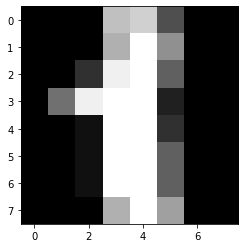

In [14]:
# 이미지를 회색 스케일로 변환
%matplotlib inline
import pylab as pl

pl.gray()

pl.imshow(digits.images[1])

# pl.show(): display a figure - 그래프 그릴 때
# pl.imshow(): display a image - data를 이미지로 표현할 때


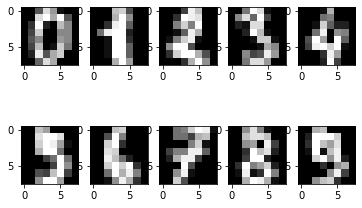

In [17]:
# 10개 출력해보기
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i])



## 2. 이미지 머신러닝 - LinearSVC이용

    학습 데이타   - 80 %
    테스트 데이타 - 20 %

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기 --- (*1)
digits = datasets.load_digits()
X = digits.images # 2차원 배열
y = digits.target

# 2차원 배열을 1차원 배열로 변환하기 --- (*2)
X = X.reshape(-1, 64)
X.shape

# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
X_train, X_test, y_train, y_test = train_test_split(X,y)


# 데이터 학습하기 --- (*4)
model = svm.LinearSVC()
fit = model.fit(X_train, y_train)


# 예측하고 정답률 출력하기 --- (*5)
y_predict = model.predict(X_test)
ac_score = accuracy_score(y_test, y_predict)
ac_score


C:\Users\Canon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9355555555555556

[결과] 실행할 때마다 정답률이 달라진다. 일반적으로 0.93~0.96 정도의 정답률이 나온다

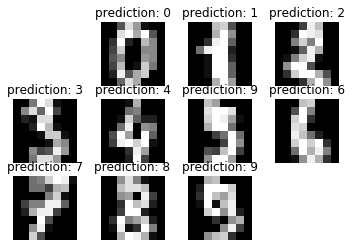

In [47]:
# 예측값과 실제 숫자 비교
img_prediction = list(zip(digits.images, fit.predict(X)))

# for 요소 in 집합:
for index, (image,prediction) in enumerate(img_prediction[:10]):
    plt.subplot(3,4,index+2)
    plt.imshow(image)
    plt.title("prediction: "+ str(prediction))
    plt.axis('off')



#### [ 참고 ] 파이썬 기본 함수 : https://wikidocs.net/32

*zip()와 list()

list(zip([1, 2, 3], [4, 5, 6])) ->
    [(1, 4), (2, 5), (3, 6)]
    
list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9])) ->
    [(1, 4, 7), (2, 5, 8), (3, 6, 9)]
    
list(zip("abc", "def")) -> 
    [('a', 'd'), ('b', 'e'), ('c', 'f')]

## 3. 작성한 이미지 판단하기

    - 그림판에서 정사각형 크기(동일 픽셀)를 만들고 검정색 굵은 선으로 숫자를 그리고 'my.png'로 저장한다
      ( 직접 손글씨 이미지 만들기  ( 200px * 200px ) )
      
    - open cv를 이용하여 이미지를 픽셀데이타로 변경한다
    
* open cv
    - https://opencv.org



[ 참고 ] opencv 관련

- https://opencv-python.readthedocs.io/en/latest/doc/08.imageProcessing/imageProcessing.html

- https://076923.github.io/posts/Python-opencv-10/
    

In [48]:
# opencv 인스톨
# !pip install opencv-python

In [52]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):

    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename, cv2.IMREAD_COLOR)
    
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
   
    
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
    # 데이터 예측하기
    res = model.predict(my_img)
    return res[0]



In [153]:
# 이미지 파일을 지정해서 실행하기
result = predict_digit('img/my.png')
print('결과: '+ str(result))

결과: 4


## [참고] 나이브베이즈 분류기 중 가우스 분포를 사용해 분류 

위에서  LinearSVC 예제와 비교만하자

In [158]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [159]:
# 숫자 데이타 로드
digits = load_digits()

# 목표변수 
y = digits.target

# 데이타준비
n_sample = len(digits.images)
X = digits.images.reshape((n_sample, -1)) 
    # reshape() : 10*10 행렬을 100 벡터(리스트?)로 변경
print(X)    

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [160]:
# 데이타셋과 훈련셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('train : ', len(X_train), ', test : ' , len(X_test))

train :  1347 , test :  450


In [183]:
# 나이브 베이즈 분류기 선택(Classifier) - 가우스분포를 사용해 확률을 추산
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)  # 데이타 적합화

# 예측하기
predicted = fit.predict(X_test)

# Confusion matrix 생성
#   : 예측된 결과가 얼마나 혼돈(잘못)되었는지 볼 수 있는 2차원 배열
result = confusion_matrix(y_test, predicted)
result


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

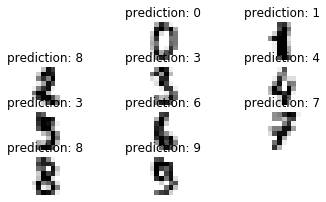

In [184]:
# 예측값과 실제 숫자 비교
images_and_predictions = list(zip(digits.images, fit.predict(X)))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(5, 3, index+5 )  # 5행 3열 subplot을 만들고 5번째부터 지정(?)
    plt.axis('off')  # 축을 나타내기 않음
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # 서브플롯으로 채워진 전체 플롯을 보여준다
    plt.title('prediction: %i' % prediction )

plt.show()

 [결과]
    8이라고 예측했는데 2라는 것이다.
    3이라고 예측했는데 아마도 5인 듯


` 이 예제는 숫자를 확인하고자 하는 샘플예문이다

### [참고]
+ 학습한 데이터 저장하기
        from sklearn.externals import joblib
        joblib.dump(clf, 'digits.pkl')

+  학습한 데이타 읽어오기
        clf = joblib.load('digits.pkl')